In [1]:
import warnings
warnings.filterwarnings('ignore')

from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize 
import numpy as np 
from sklearn.model_selection import train_test_split
import pandas as pd 

In [2]:
df = pd.read_csv('rinde.csv')
X = df[['NDVI','GNDVI']]  
y = df['DryYield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
# train IForest detector
clf_name = 'Regresión IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores 

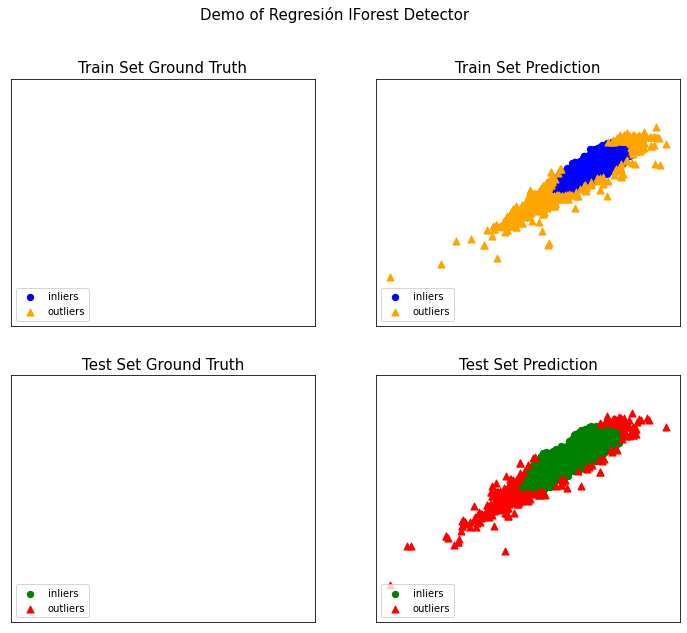

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,20)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

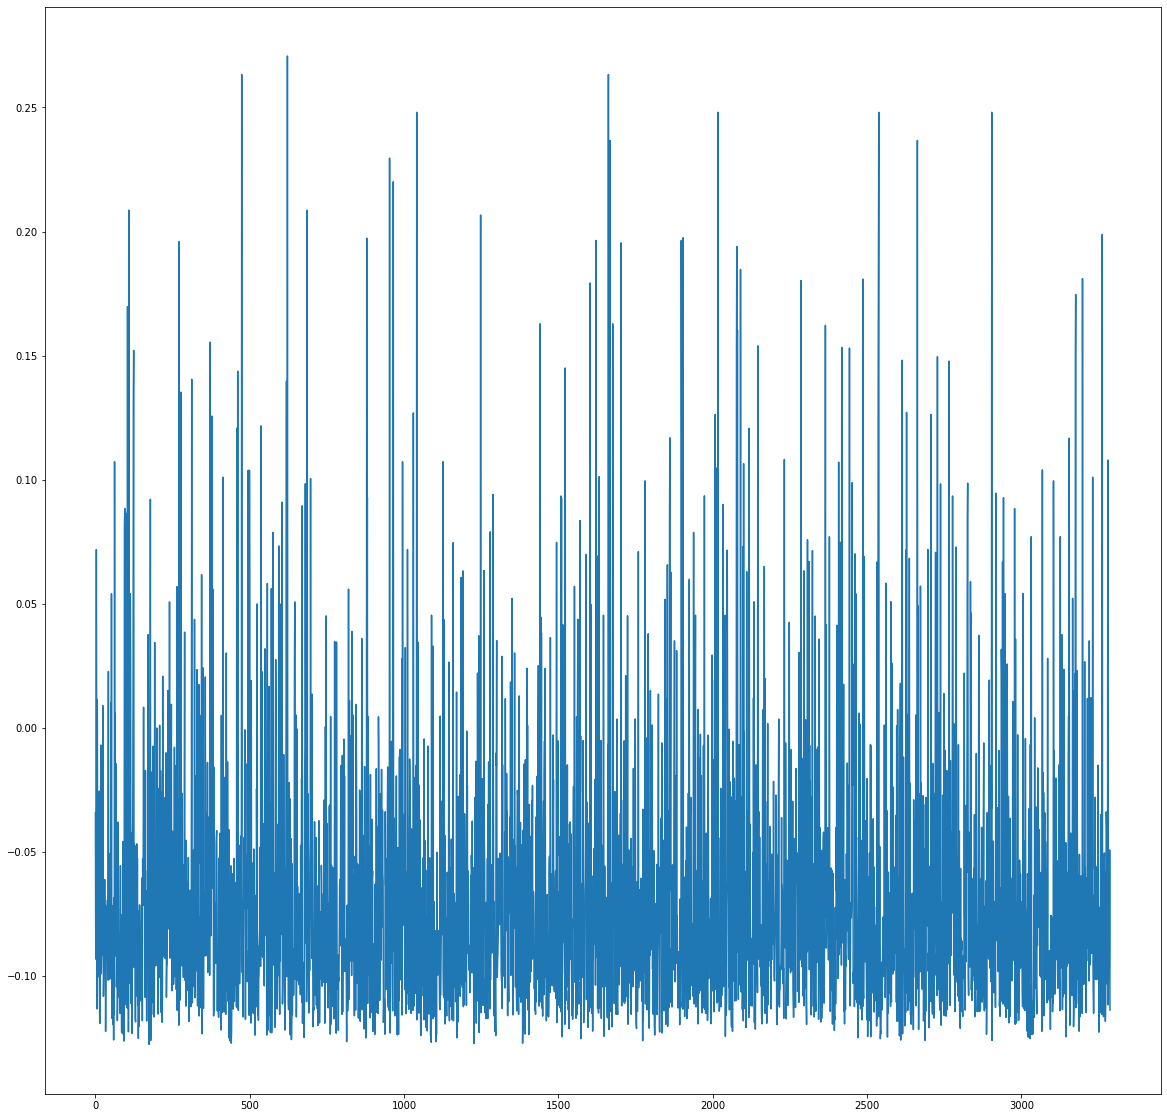

In [5]:
plt.plot(y_test_scores.T)


In [6]:
X_test['outlier?'] = y_test_pred 

In [7]:
X_test.head()

,NDVI,GNDVI,outlier?
518,0.66037,0.77459,0
3649,0.66297,0.79038,0
568,0.63934,0.76119,1
39,0.60711,0.76214,1
4808,0.62669,0.76277,0


In [8]:
X_train['outlier?'] = y_train_pred
X_train.head()

,NDVI,GNDVI,outlier?
9080,0.63642,0.77085,0
2626,0.66839,0.78789,0
7072,0.69848,0.81121,0
8565,0.67429,0.78306,0
9006,0.65326,0.78510,0
